In [28]:
# ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Using telco_churn database, predict total charges
- Using the telco_churn database, extract a table for each customer with a 2-year contract and include the following information customer id, tenure, monthly charges, and total charges.
- Export the table to a csv
- Create a jupyter notebook titled regression
- Prepare the Environment (do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!)
- Read the information from the customers table into a dataframe.
- How many rows are in your dataframe?
- What is the data type of the field containing the customer ids?
- Print to the notebook the last 10 rows of your dataframe.
- What is the inner quartile range of tenure? monthly charges? total charges?
- How many missing values are in each variable?
- Fill any missing values with 0.
- Show the ditribution of monthly charges through a histogram
- Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.
- Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.
- Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [29]:
path = './'
df = pd.read_csv(path + "telco_regression_ex2.csv")

In [189]:
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [30]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [31]:
df.shape

(1695, 4)

In [32]:
df.describe()

,tenure,monthly_charges
count,1695.000000,1695.000000
mean,56.735103,60.770413
std,18.209363,34.678865
min,0.000000,18.400000
25%,48.000000,24.025000
50%,64.000000,64.350000
75%,71.000000,90.450000
max,72.000000,118.750000


In [33]:
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [34]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


In [39]:
df.describe()

,tenure,monthly_charges
count,1695.000000,1695.000000
mean,56.735103,60.770413
std,18.209363,34.678865
min,0.000000,18.400000
25%,48.000000,24.025000
50%,64.000000,64.350000
75%,71.000000,90.450000
max,72.000000,118.750000


In [43]:
df['total_charges'] = df['total_charges'].apply(lambda x: 0 if x == ' ' else x)

In [45]:
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [46]:
df['total_charges'] = df.total_charges.astype(float)

In [47]:
df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [51]:
df.describe()

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000


In [52]:
df_iqr_range = pd.DataFrame()

In [55]:
df_iqr_range['IQR']=(df.describe()).iloc[6]-(df.describe()).iloc[4]

In [57]:
df_iqr_range['Range']=(df.describe()).iloc[7]-(df.describe()).iloc[3]

In [64]:
df_iqr_range.T

,tenure,monthly_charges,total_charges
IQR,23.0,66.425,4719.125
Range,72.0,100.350,8672.450


In [191]:
from scipy.stats import iqr
iqr(df.tenure)

23.0

In [60]:
df_nan = pd.DataFrame()

df.isna().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

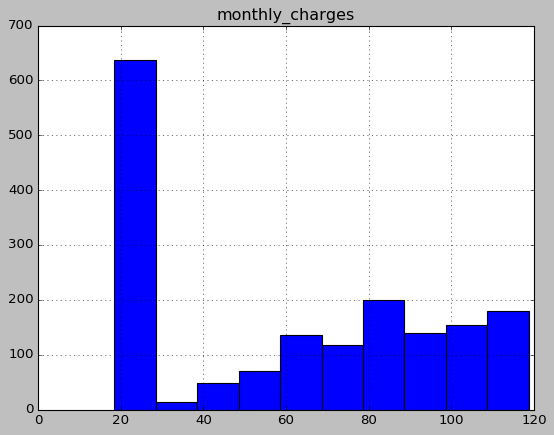

In [192]:
df.hist(column='monthly_charges')
plt.show()

In [75]:
ndf = df.drop(columns=['customer_id'])

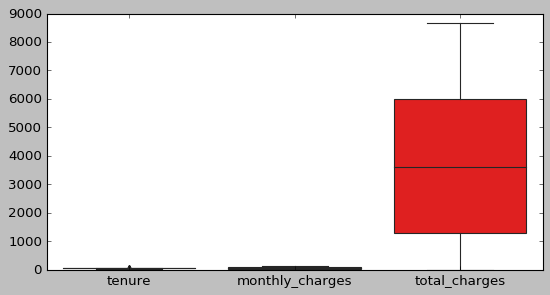

In [78]:
plt.figure(figsize=(8,4))
sns.boxplot(data=ndf)
plt.show()

# Train_test_split Section

In [79]:
X = ndf.drop(['total_charges'], axis=1)
y = ndf[['total_charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [80]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [155]:
# y_train

# Using the in-sample data (X_train and y_train)

- Create a scatterplot for each combination of variables.
- Create a heatmap containing the 3 variables.
- Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"
- Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.
- What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.
- What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.
- Write the linear function in the form of $y=mx+b$ using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.
- Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.
- Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

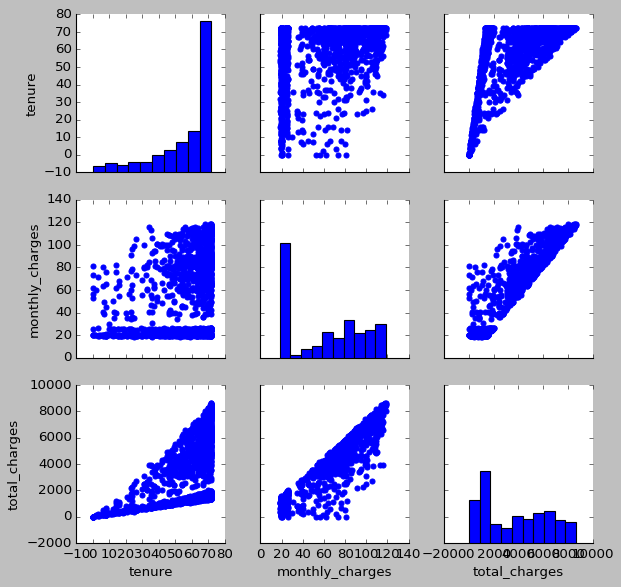

In [103]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

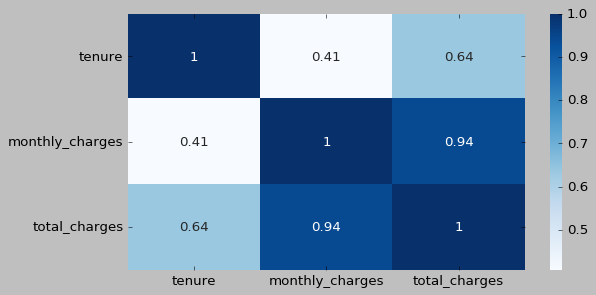

In [105]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

In [86]:
pearsonr(X_train[['monthly_charges']], y_train)

(array([0.94171495]), array([0.]))

In [88]:
[[column, pearsonr(train[column], train.total_charges)] for column in X_train] 

[['tenure', (0.6350021065102249, 5.692136817600413e-154)],
 ['monthly_charges', (0.9417149491320433, 0.0)]]

In [89]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.total_charges) for col in column_names]

tot_charge_corr_dict = dict(zip(column_names, r_and_p_values))
tot_charge_corr_dict

{'tenure': (0.6350021065102249, 5.692136817600413e-154),
 'monthly_charges': (0.9417149491320433, 0.0)}

In [90]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:55:21   Log-Likelihood:                -11134.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.7532      0.885      8.764      0.000       6.018       9.489
monthly_charges    57.4366      0.752     76.399      0.000      55.962      58.911
==============================================================================
Omnibus:                      233.389   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.251
Skew:                          -0.961   Prob(JB):                    4.37e-116
Kurtosis:                       5.390   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [113]:
lm1.fit(X_train[['tenure']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[67.81557644]]


In [114]:
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 67.82



- The intercept tells us where the linear model predicts total_charges (y) would be when tenure (x) is 0.
- The slope of the regression line is the coefficient for (x) or "tenure", which is 67.82.
- This means that for every incremental increase in tenure (month), the total charges increase by $67.82$
- The slope means:  the change in y over change in x.
- $y = (67.82*tenure) + 0$

In [164]:
y_pred_lm1 = lm1.predict(X_train[['tenure']])
y_pred_lm1.shape

(1356, 1)

In [163]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 4.21e+06


In [117]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  37.46% of the variance in the students final grade can be explained by the grade on the first exam.


Text(0.5, 1.0, 'Predicted vs Actual')

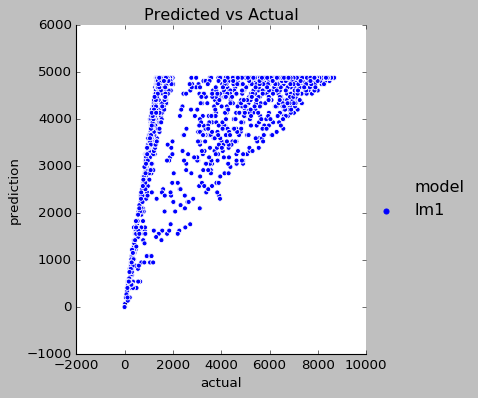

In [120]:
pd.DataFrame({'actual': y_train.total_charges,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.title('Predicted vs Actual')

Text(0, 0.5, 'Residuals')

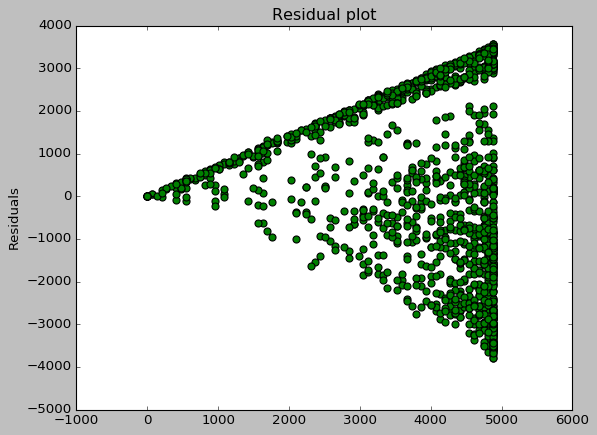

In [173]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [133]:
t1_lm1 = LinearRegression(fit_intercept=False)
print(t1_lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [134]:
t1_lm1.fit(X_test[['tenure']], y_test)
print(t1_lm1)

t1_lm1_y_intercept = t1_lm1.intercept_
print(t1_lm1_y_intercept)

t1_lm1_coefficients = t1_lm1.coef_
print(t1_lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[66.94150119]]


In [135]:
print('Univariate - final_exam = b + m * tenure')
print('    y-intercept (b): %.2f' % t1_lm1_y_intercept)
print('    coefficient (m): %.2f' % t1_lm1_coefficients[0])
print()

Univariate - final_exam = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 66.94



In [136]:
y_pred_t1_lm1 = t1_lm1.predict(X_test[['tenure']])

In [137]:
mse_t1_lm1 = mean_squared_error(y_test, y_pred_t1_lm1)
print("t1_lm1\n  mse: {:.3}".format(mse_t1_lm1))

t1_lm1
  mse: 3.88e+06


In [138]:
r2_t1_lm1 = r2_score(y_test, y_pred_t1_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_t1_lm1))

  38.38% of the variance in the students final grade can be explained by the grade on the first exam.


In [1]:
mae_t1_lm1 = median_absolute_error(y_test, y_pred_t1_lm1)

NameError: name 'median_absolute_error' is not defined

In [166]:
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)

1731.3266353372169

# Using the out-of-sample data (X_test, y_test)

- Test your model on the test sample.
- Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?
- Calculate the p-value of the regressor for the train and test sample. Hint: f_regression
- Create a scatter plot of the predicted values versus the actual values in the test sample.
- Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.
- Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

In [167]:
print(mse_lm1)
print(mse_t1_lm1)
print(r2_lm1)
print(r2_t1_lm1)
print(mae_lm1)
print(mae_t1_lm1)

4213606.416200152
3878550.322736952
0.3746335730051228
0.3838192406990887
1731.3266353372169
1609.8779188154176


# How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [196]:
from sklearn.feature_selection import f_regression
f_regression(X_test[['tenure']], y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([231.6718391]), array([3.48651193e-40]))

Text(0, 0.5, 'Residuals')

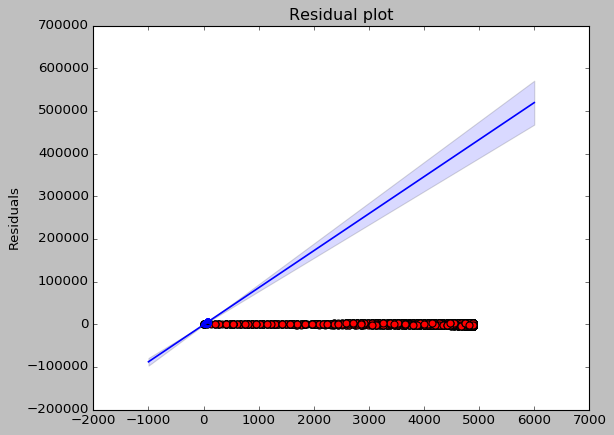

In [194]:
plt.scatter(y_pred_t1_lm1, y_pred_t1_lm1 - y_test, c='g', s=40)
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='r', s=40)
sns.regplot( X_test[['tenure']], y_test.total_charges, data=test)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

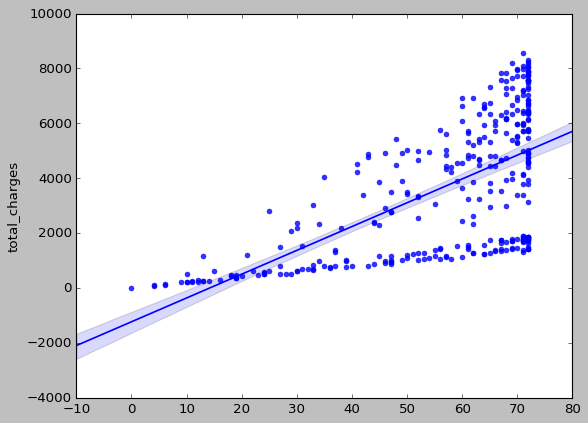

In [186]:
sns.regplot( X_test[['tenure']], y_test.total_charges, data=test)
plt.show()

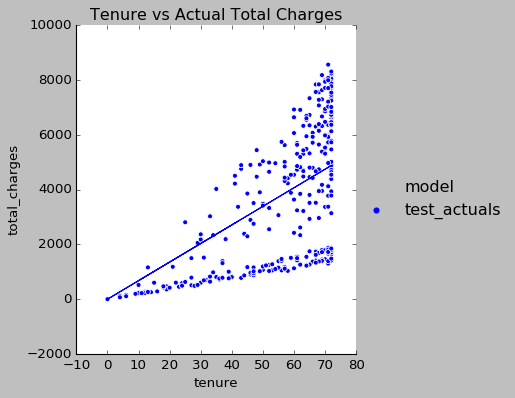

In [197]:
pd.DataFrame({'tenure' : X_test.tenure,
             'test_actuals' : y_test.total_charges})\
   .melt(id_vars=['tenure'], var_name='model', value_name='total_charges')\
   .pipe((sns.relplot, 'data'), x='tenure', y='total_charges', hue='model')
plt.plot
plt.title('Tenure vs Actual Total Charges')
x = X_test.tenure
y = y_test.total_charges
m = 67.8155
b = 0
plt.plot(x, b + m * x, '-')
plt.show()